In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [3]:
Total_Accidents = pd.read_csv("Boat Resources/Total Accidents V3.csv")
Total_Accidents.dropna(inplace=True)
Total_Accidents.head()

,State,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alabama,120,173,138,118,114,87,70,83,70,...,73,71,62,71,79,46,70,66,101,96
1,Alaska,91,90,99,77,68,64,42,48,52,...,20,23,18,18,25,26,15,22,14,22
2,Arizona,327,321,239,302,331,222,217,188,174,...,158,99,95,87,97,90,123,129,96,162
3,Arkansas,92,111,115,91,87,75,74,50,55,...,55,68,56,54,49,47,64,60,37,75
4,California,849,920,770,894,900,771,745,797,603,...,399,365,426,379,369,386,350,322,324,493


In [4]:
Fatalities = pd.read_csv("Boat Resources/Fatalities V3.csv")
Fatalities.dropna(inplace=True)
Fatalities.head()

,State,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alabama,24,25,32,17,11,17,12,15,20,...,19,17,10,13,21,14,21,17,28,19
1,Alaska,14,23,38,26,18,21,16,21,16,...,15,22,10,11,7,19,20,22,11,24
2,Arizona,8,8,14,9,12,7,8,7,11,...,11,4,9,7,6,5,13,11,7,10
3,Arkansas,20,15,20,15,10,13,24,6,8,...,15,8,15,8,9,10,11,7,10,13
4,California,56,42,56,42,49,48,53,61,43,...,52,49,37,38,48,47,50,34,39,39


In [5]:
Fatal_Accidents = pd.read_csv("Boat Resources/Fatal Accidents V3.csv")
Fatal_Accidents.dropna(inplace=True)
Fatal_Accidents.head()

,State,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alabama,21,24,27,17,11,16,12,15,17,...,14,16,10,12,17,12,18,13,25,12
1,Alaska,13,19,24,21,16,20,14,16,14,...,13,15,7,10,7,14,13,17,8,15
2,Arizona,7,7,10,7,9,7,8,5,10,...,10,3,9,7,6,5,11,6,7,7
3,Arkansas,19,14,18,14,9,12,20,6,5,...,13,8,13,7,9,9,11,7,10,13
4,California,48,41,45,36,40,43,46,56,35,...,47,37,34,29,41,43,49,33,37,37


In [6]:
Alcohol_Fatal = pd.read_csv("Boat Resources/Alcohol by State and Year V4.csv")
Alcohol_Fatal.dropna(inplace=True)
Alcohol_Fatal.head()

,State,Average Deaths,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alabama,4.090909,5,6,1,4,5,5,1,1,10,1,6
1,Alaska,4.181818,1,8,2,4,3,3,6,2,7,8,2
2,Arizona,1.545455,3,0,3,2,1,2,2,1,0,1,2
3,Arkansas,1.909091,0,4,2,2,2,2,3,2,4,0,0
4,California,4.636364,4,3,6,2,5,3,3,4,5,6,10


In [7]:
Alcohol_Fatal2 = Alcohol_Fatal.drop(columns=['2010','2011', '2012', '2013', '2014','2015', '2016', '2017', '2018', '2019', '2020'])
Alcohol_Fatal2.head()


,State,Average Deaths
0,Alabama,4.090909
1,Alaska,4.181818
2,Arizona,1.545455
3,Arkansas,1.909091
4,California,4.636364


In [8]:
Ave_Pop = pd.read_csv("Boat Resources/Population US by State and Year V3.csv")
Ave_Pop.dropna(inplace=True)
Ave_Pop.head()

,State,Average Population,2010,2020
0,Alabama,"4,902,270","4,779,736","5,024,803"
1,Alaska,"721,336","710,231","732,441"
2,Arizona,"6,785,002","6,392,017","7,177,986"
3,Arkansas,"2,964,075","2,915,918","3,012,232"
4,California,"38,376,847","37,253,956","39,499,738"


In [9]:
Ave_Pop2 = Ave_Pop.drop(columns=['2010', '2020'])
Ave_Pop2.head()


,State,Average Population
0,Alabama,"4,902,270"
1,Alaska,"721,336"
2,Arizona,"6,785,002"
3,Arkansas,"2,964,075"
4,California,"38,376,847"


In [10]:
Ave_Alcohol_Fatal = pd.merge(Alcohol_Fatal2, Ave_Pop2, on='State', how='outer')
Ave_Alcohol_Fatal.head()

,State,Average Deaths,Average Population
0,Alabama,4.090909,"4,902,270"
1,Alaska,4.181818,"721,336"
2,Arizona,1.545455,"6,785,002"
3,Arkansas,1.909091,"2,964,075"
4,California,4.636364,"38,376,847"


In [11]:
Ave_Alcohol_Fatal["% Death Per Person"] = ""

In [12]:
Ave_Alcohol_Fatal.dtypes

State                  object
Average Deaths        float64
Average Population     object
% Death Per Person     object
dtype: object

In [13]:
Ave_Alcohol_Fatal['Average Population'] = Ave_Alcohol_Fatal['Average Population'].str.replace(",", "").astype(float)

In [86]:
Ave_Alcohol_Fatal["% Death Per Person"] = ((Ave_Alcohol_Fatal["Average Deaths"]/11)/Ave_Alcohol_Fatal["Average Population"])*100
Ave_Alcohol_Fatal.head()


,State,Average Deaths,Average Population,% Death Per Person
0,Alabama,4.090909,4902270.0,0.000008
1,Alaska,4.181818,721336.0,0.000053
2,Arizona,1.545455,6785002.0,0.000002
3,Arkansas,1.909091,2964075.0,0.000006
4,California,4.636364,38376847.0,0.000001


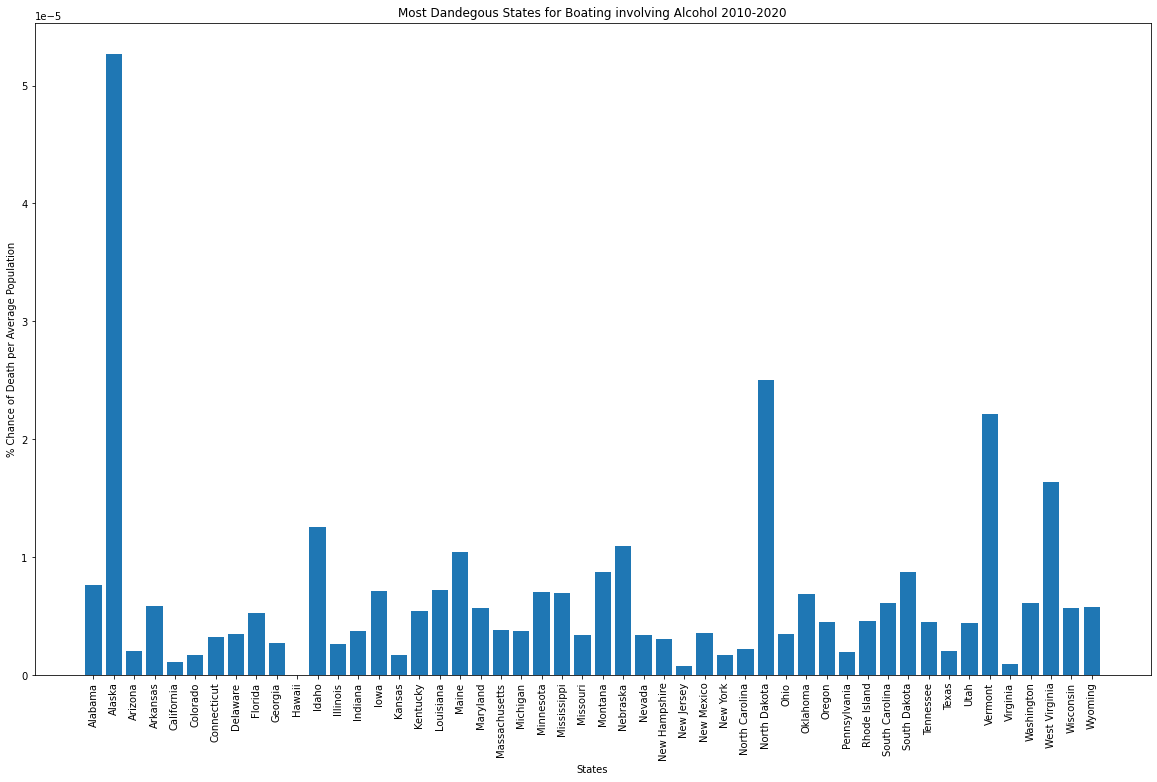

In [97]:
x_axis = Ave_Alcohol_Fatal["State"]
y_axis = Ave_Alcohol_Fatal["% Death Per Person"]

plt.bar(x_axis, y_axis, align="center")

plt.title("Most Dandegous States for Boating involving Alcohol 2010-2020")
plt.xlabel("States")
plt.ylabel("% Chance of Death per Average Population")
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = (20,12)
plt.show()

In [18]:
Sum_Fatal_Accidents = pd.read_csv("Boat Resources/summary_of_fatal_transport V3.csv")
Sum_Fatal_Accidents.head()


,State,Car Fatals,Trains,Plane,Boat
0,Alabama,9993,18,2,199
1,Alaska,750,0,28,172
2,Arizona,9919,8,3,89
3,Arkansas,5955,11,0,120
4,California,37183,82,3,481


In [26]:
Sum_Fatal_Accidents['Trains'] = Sum_Fatal_Accidents['Trains'].astype(float)
Sum_Fatal_Accidents['Plane'] = Sum_Fatal_Accidents['Plane'].astype(float)
Sum_Fatal_Accidents['Boat'] = Sum_Fatal_Accidents['Boat'].astype(float)
Sum_Fatal_Accidents['Car Fatals'] = Sum_Fatal_Accidents['Car Fatals'].astype(float)

In [36]:
Train_tot = Sum_Fatal_Accidents['Trains'].sum()
Boat_tot = Sum_Fatal_Accidents['Boat'].sum()
Plane_tot = Sum_Fatal_Accidents['Plane'].sum()


([<matplotlib.patches.Wedge at 0x1367a904c88>,
 [Text(1.060243348961413, 0.29305979079888755, 'Train'),
  Text(-1.1680377521260505, -0.2751141755859254, 'Boat'),
  Text(1.0991909650872995, -0.042180828233351286, 'Plane')],
 [Text(0.5783145539789525, 0.15985079498121138, '8.6%'),
  Text(-0.6813553554068628, -0.16048326909178978, '90.2%'),
  Text(0.599558708229436, -0.02300772449091888, '1.2%')])

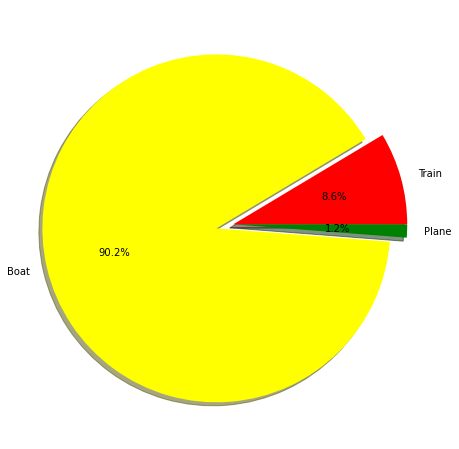

In [85]:
labels = ["Train", "Boat", "Plane"]
counts = [Train_tot, Boat_tot, Plane_tot]
colors = ["red", "yellow", "Green"]
explode = (0, 0.1, 0)
plt.pie(counts, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True,)

In [65]:
Sum_Fatal_Accidents3 = Sum_Fatal_Accidents.drop(columns=['Car Fatals'])
Sum_Fatal_Accidents3["Total Deaths"] = ""
Sum_Fatal_Accidents3["Total Deaths"] = Sum_Fatal_Accidents3.sum(axis = 1)
Sum_Fatal_Accidents3.head()

c:\Users\Brendan\anaconda3\envs\bootcamp\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,State,Trains,Plane,Boat,Total Deaths
0,Alabama,18.0,2.0,199.0,219.0
1,Alaska,0.0,28.0,172.0,200.0
2,Arizona,8.0,3.0,89.0,100.0
3,Arkansas,11.0,0.0,120.0,131.0
4,California,82.0,3.0,481.0,566.0


In [66]:
Sum_Fatal_Accidents["Total Deaths"] = ""
Sum_Fatal_Accidents["Total Deaths"] = Sum_Fatal_Accidents.sum(axis = 1)
Sum_Fatal_Accidents.head()

c:\Users\Brendan\anaconda3\envs\bootcamp\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,State,Car Fatals,Trains,Plane,Boat,Total Deaths
0,Alabama,9993.0,18.0,2.0,199.0,10212.0
1,Alaska,750.0,0.0,28.0,172.0,950.0
2,Arizona,9919.0,8.0,3.0,89.0,10019.0
3,Arkansas,5955.0,11.0,0.0,120.0,6086.0
4,California,37183.0,82.0,3.0,481.0,37749.0


In [67]:
Sum_Fatal_Accidents2 = pd.merge(Sum_Fatal_Accidents, Ave_Pop2, on='State', how='outer')
Sum_Fatal_Accidents2['Average Population'] = Sum_Fatal_Accidents2['Average Population'].str.replace(",", "").astype(float)
Sum_Fatal_Accidents2.head()

,State,Car Fatals,Trains,Plane,Boat,Total Deaths,Average Population
0,Alabama,9993.0,18.0,2.0,199.0,10212.0,4902270.0
1,Alaska,750.0,0.0,28.0,172.0,950.0,721336.0
2,Arizona,9919.0,8.0,3.0,89.0,10019.0,6785002.0
3,Arkansas,5955.0,11.0,0.0,120.0,6086.0,2964075.0
4,California,37183.0,82.0,3.0,481.0,37749.0,38376847.0


In [88]:
Sum_Fatal_Accidents2["% Death Per Person"] = ""
Sum_Fatal_Accidents2["% Death Per Person"] = ((Sum_Fatal_Accidents2["Total Deaths"]/11)/Ave_Alcohol_Fatal["Average Population"])*100
Sum_Fatal_Accidents2.head()

,State,Car Fatals,Trains,Plane,Boat,Total Deaths,Average Population,% Death Per Person
0,Alabama,9993.0,18.0,2.0,199.0,10212.0,4902270.0,0.018937
1,Alaska,750.0,0.0,28.0,172.0,950.0,721336.0,0.011973
2,Arizona,9919.0,8.0,3.0,89.0,10019.0,6785002.0,0.013424
3,Arkansas,5955.0,11.0,0.0,120.0,6086.0,2964075.0,0.018666
4,California,37183.0,82.0,3.0,481.0,37749.0,38376847.0,0.008942


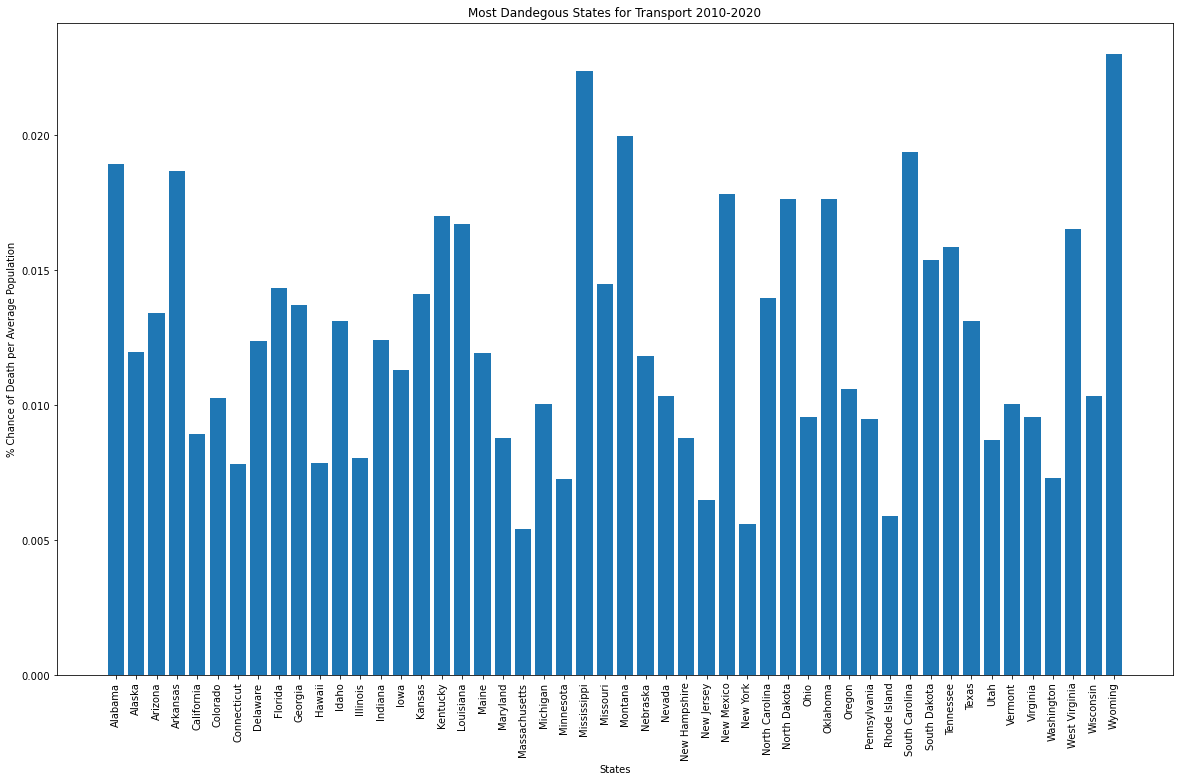

In [90]:
x_axis = Sum_Fatal_Accidents2["State"]
y_axis = Sum_Fatal_Accidents2["% Death Per Person"]

plt.bar(x_axis, y_axis, align="center")

plt.title("Most Dandegous States for Transport 2010-2020")
plt.xlabel("States")
plt.ylabel("% Chance of Death per Average Population")
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = (20,12)
plt.show()

In [91]:
Safest_State = Sum_Fatal_Accidents2.nsmallest(5, '% Death Per Person')
Safest_State   

,State,Car Fatals,Trains,Plane,Boat,Total Deaths,Average Population,% Death Per Person
20,Massachusetts,3921.0,5.0,0.0,113.0,4039.0,6784925.0,0.005412
31,New York,11922.0,23.0,5.0,252.0,12202.0,19766518.0,0.005612
38,Rhode Island,676.0,1.0,0.0,20.0,697.0,1074398.0,0.005898
29,New Jersey,6362.0,7.0,0.0,69.0,6438.0,9035819.0,0.006477
22,Minnesota,4222.0,12.0,0.0,158.0,4392.0,5505545.0,0.007252


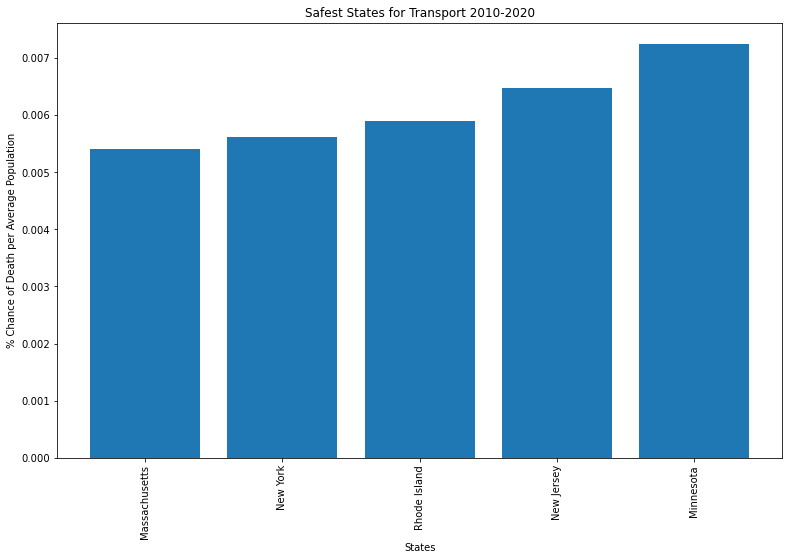

In [93]:
x_axis = Safest_State["State"]
y_axis = Safest_State["% Death Per Person"]

plt.bar(x_axis, y_axis, align="center")

plt.title("Safest States for Transport 2010-2020")
plt.xlabel("States")
plt.ylabel("% Chance of Death per Average Population")
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = (13,8)
plt.show()

In [101]:
Most_danger = Sum_Fatal_Accidents2.nlargest(5, '% Death Per Person')
Most_danger

,State,Car Fatals,Trains,Plane,Boat,Total Deaths,Average Population,% Death Per Person
49,Wyoming,1415.0,5.0,0.0,25.0,1445.0,570447.0,0.023028
23,Mississippi,7179.0,24.0,0.0,96.0,7299.0,2962084.0,0.022401
25,Montana,2202.0,9.0,0.0,69.0,2280.0,1037804.0,0.019972
39,South Carolina,10184.0,13.0,0.0,210.0,10407.0,4878047.0,0.019395
0,Alabama,9993.0,18.0,2.0,199.0,10212.0,4902270.0,0.018937


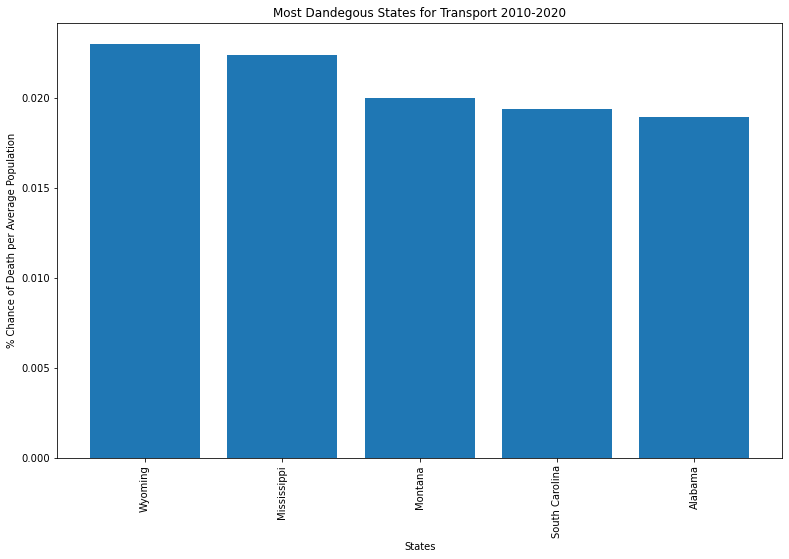

In [95]:
x_axis = Most_danger["State"]
y_axis = Most_danger["% Death Per Person"]

plt.bar(x_axis, y_axis, align="center")

plt.title("Most Dandegous States for Transport 2010-2020")
plt.xlabel("States")
plt.ylabel("% Chance of Death per Average Population")
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = (13,8)
plt.show()

In [104]:
Safety = pd.read_csv("Boat Resources/Safety Equipment Worn V3.csv")
Safety.dropna(inplace=True)
Safety.head()

,Year,Life Jacket Worn,Not Worn,Unknown
0,2010,119,471,49
1,2011,134,503,62
2,2012,121,472,11
3,2013,108,392,11
4,2014,105,411,19


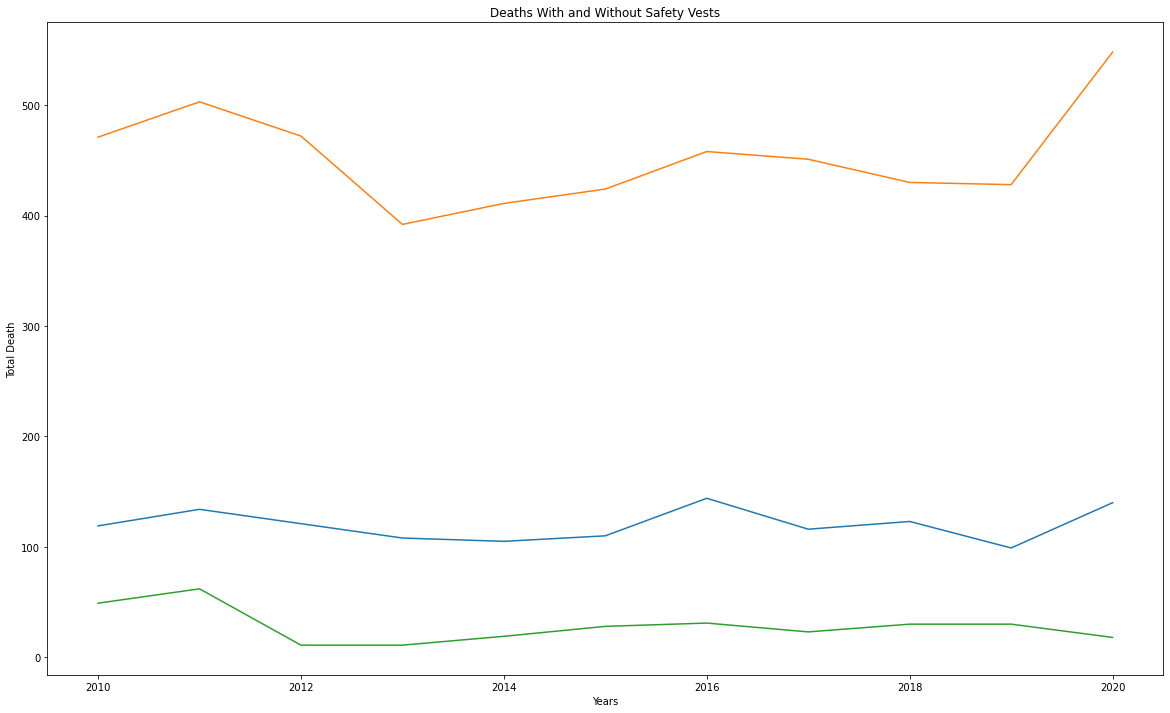

In [106]:
Worn = Safety['Life Jacket Worn']
Not_Worn = Safety['Not Worn']
Unknown = Safety['Unknown']
Year = Safety['Year']

plt.title("Deaths With and Without Safety Vests")
plt.xlabel("Years")
plt.ylabel("Total Death")
plt.plot(Year, Worn)
plt.plot(Year, Not_Worn)
plt.plot(Year, Unknown)
plt.show()
